In [33]:
from ultimate_pig import Player, SolitaireGame
#import ultimate_pig
import random
import matplotlib.pyplot as plt
import statistics as st
import math

In [34]:
%matplotlib inline

In [35]:
class BestPlayer(Player):
    """
        Should decide whether to go again
        This is the hold at 30 player
    """
    def go_again(self, turn_score):
        # lets come up with some algorithm to decide to go again or not
        if turn_score < 30:
            return True
        else:
            return False

In [36]:
class BetterPlayer(Player):
    """
        Should decide whether to go again
        This is the player that tries to calculate to hold or roll
        based on score and number of rolls
    """
    def go_again(self, turn_score):
        return (turn_score + 11*len(self.rolls)) <= 300

In [37]:
player1 = Player('Basic')
player2 = BetterPlayer('Better')
player3 = BestPlayer('Best')

In [145]:
simBasic1000results = []
for i in range(1000):
    player = Player('basic')
    game = SolitaireGame(player)
    simBasic1000results.append(game.start())

In [146]:
st.mean([r for r in simBasic1000results])

23.111

In [147]:
st.pstdev([r for r in simBasic1000results])

5.200834452277826

In [148]:
simBetter1000results = []
for i in range(1000):
    player = BetterPlayer('better')
    game = SolitaireGame(player)
    simBetter1000results.append(game.start())

In [149]:
st.mean([r for r in simBetter1000results])

32.482

In [150]:
st.pstdev([r for r in simBasic1000results])

5.200834452277826

In [151]:
simBest1000results = []
for i in range(1000):
    player = BestPlayer('best')
    game = SolitaireGame(player)
    simBest1000results.append(game.start())

In [152]:
st.mean([r for r in simBest1000results])

52.899

In [153]:
st.pstdev([r for r in simBasic1000results])

5.200834452277826

In [130]:
def n_trials(n, player_class=Player):
    results = []
    for _ in range(n):
        player = player_class('Bob')
        game = SolitaireGame(player)
        results.append(game.start())
    return results

In [131]:
n_basic = n_trials(2000, Player)
n_better = n_trials(2000, BetterPlayer)
n_best = n_trials(2000, BestPlayer)

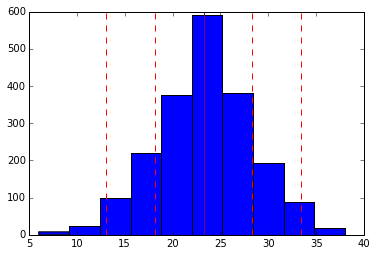

In [132]:
plt.hist(n_basic)
ymin, ymax = plt.ylim()
mean_a = st.mean(n_basic)
stdev_a = st.pstdev(n_basic)
plt.vlines(mean_a, ymin, ymax, color="purple")
plt.vlines([mean_a - 2* stdev_a, mean_a - stdev_a, mean_a + stdev_a, mean_a + 2 * stdev_a], ymin, ymax, linestyles="dashed", color="red")
plt.show()
plt.show()

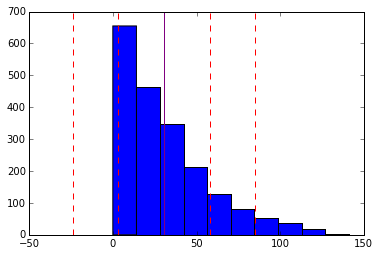

In [136]:
plt.hist(n_better)
ymin, ymax = plt.ylim()
mean_b = st.mean(n_better)
stdev_b = st.pstdev(n_better)
plt.vlines(mean_b, ymin, ymax, color="purple")
plt.vlines([mean_b - 2* stdev_b, mean_b - stdev_b, mean_b + stdev_b, mean_b + 2 * stdev_b], ymin, ymax, linestyles="dashed", color="red")
plt.show()
plt.show()

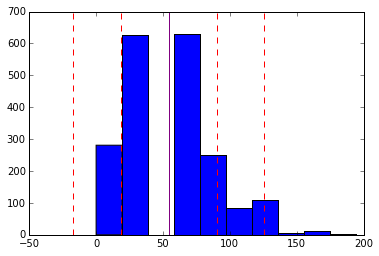

In [137]:
plt.hist(n_best)
ymin, ymax = plt.ylim()
mean_c = st.mean(n_best)
stdev_c = st.pstdev(n_best)
plt.vlines(mean_c, ymin, ymax, color="purple")
plt.vlines([mean_c - 2* stdev_c, mean_c - stdev_c, mean_c + stdev_c, mean_c + 2 * stdev_c], ymin, ymax, linestyles="dashed", color="red")
plt.show()
plt.show()

In [ ]:
## Basic has a mean in the 20s
## Better has a mean in the 30s
## Best has a mean in the 50s

In [ ]:
## they all seem to have to the same std dev of 5.2